# Algorithm Performance Data Analysis - Run 1

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 100 | 0 | 
| max | 140 | 0.0500 | 
| step| 1 | 0.0005 | 
| iteration | 41 | 101 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_142414.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_142414,10404007.png,502730,68689,434041,0.863368,20,12,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0000
1,2,test_20231101_142414,1254659.png,342646,125194,217452,0.634626,4,7,80080,16732,63348,0.791059,15.738857,1878.393712,15.392937,100,0.0000
2,3,test_20231101_142414,10188041.png,221231,16144,205087,0.927027,3,7,41731,2264,39467,0.945748,9.145374,732.734949,19.481335,100,0.0000
3,4,test_20231101_142414,10287332.png,216980,18909,198071,0.912854,1,6,22337,2561,19776,0.885347,8.568555,587.347168,20.441855,100,0.0000
4,5,test_20231101_142414,11610969.png,368720,56079,312641,0.847909,4,10,84111,8069,76042,0.904067,16.248012,1779.797947,15.627097,100,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,6,test_20231101_151414,10350842.png,212614,16,212598,0.999925,0,4,42529,1,42528,0.999976,55.226706,11938.014080,7.361483,140,0.0495
40996,7,test_20231101_151414,10863862.png,317432,16,317416,0.999950,1,4,66058,1,66057,0.999985,55.749476,12668.007861,7.103720,140,0.0495
40997,8,test_20231101_151414,11382381.png,312486,16,312470,0.999949,1,4,46745,1,46744,0.999979,30.521228,5261.919984,10.919361,140,0.0495
40998,9,test_20231101_151414,11079715.png,443815,42401,401414,0.904462,4,4,124136,6004,118132,0.951634,30.797497,6215.471467,10.196063,140,0.0495


In [3]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000
mean,5.500000,321053.700000,22674.717122,298378.982878,0.939920,1.854512,4.110927,60908.400000,3164.065244,57744.334756,0.962371,28.318226,4886.008708,12.206336,120.000000,0.024750
std,2.872316,92669.502975,39907.626030,83204.712442,0.096189,1.386618,1.427957,27852.697128,5516.339317,23838.939281,0.051664,13.272348,3537.093061,2.891621,11.832304,0.014433
min,1.000000,212614.000000,16.000000,197133.000000,0.589354,0.000000,3.000000,22337.000000,1.000000,19776.000000,0.791059,8.568555,587.347168,4.132739,100.000000,0.000000
25%,3.000000,221231.000000,16.000000,216964.000000,0.940744,1.000000,4.000000,41731.000000,1.000000,41078.000000,0.942024,18.867195,2588.328869,10.919361,110.000000,0.012375
50%,5.500000,314959.000000,3384.000000,293963.000000,0.985706,2.000000,4.000000,54005.000000,494.000000,49218.500000,0.988009,24.866876,3621.579733,12.541823,120.000000,0.024750
75%,8.000000,368720.000000,18646.000000,324317.250000,0.999941,2.000000,4.000000,80080.000000,2672.250000,70406.000000,0.999976,31.611186,5261.919984,14.000609,130.000000,0.037125
max,10.000000,502730.000000,182251.000000,502714.000000,0.999968,28.000000,36.000000,124136.000000,24973.000000,118132.000000,0.999988,86.396510,25107.671600,20.441855,140.000000,0.049500


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_142414,10404007.png,502730,68689,434041,0.863368,20,12,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0000
10,1,test_20231101_142415,10404007.png,502730,68689,434041,0.863368,11,4,61265,9572,51693,0.843761,22.999145,2716.837264,13.790167,100,0.0005
20,1,test_20231101_142416,10404007.png,502730,67764,434966,0.865208,3,5,61265,9462,51803,0.845556,23.058176,2727.906720,13.772508,100,0.0010
30,1,test_20231101_142417,10404007.png,502730,67664,435066,0.865407,4,6,61265,9448,51817,0.845785,23.062940,2728.830677,13.771038,100,0.0015
40,1,test_20231101_142417,10404007.png,502730,66759,435971,0.867207,3,4,61265,9333,51932,0.847662,23.095134,2734.940592,13.761325,100,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40950,1,test_20231101_151411,10404007.png,502730,16,502714,0.999968,1,5,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,140,0.0475
40960,1,test_20231101_151412,10404007.png,502730,16,502714,0.999968,1,4,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,140,0.0480
40970,1,test_20231101_151413,10404007.png,502730,16,502714,0.999968,0,4,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,140,0.0485
40980,1,test_20231101_151413,10404007.png,502730,16,502714,0.999968,0,3,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,140,0.0490


In [ ]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [2]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_53682/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [4]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231101_142414,100,0.0000,5.5,321053.7,52232.6,268821.1,0.857548,4.5,7.3,60908.4,7191.5,53716.9,0.902400,14.869222,1507.739129,16.736397
1,test_20231101_142415,100,0.0005,5.5,321053.7,52137.1,268916.6,0.857898,6.0,4.3,60908.4,7178.5,53729.9,0.902740,15.195461,1553.799560,16.580626
2,test_20231101_142416,100,0.0010,5.5,321053.7,51781.2,269272.5,0.858968,3.3,4.2,60908.4,7131.8,53776.6,0.903624,15.499654,1604.533231,16.437959
3,test_20231101_142417,100,0.0015,5.5,321053.7,51669.6,269384.1,0.859367,3.0,4.2,60908.4,7115.8,53792.6,0.904014,15.614288,1622.618817,16.380759
4,test_20231101_142417,100,0.0020,5.5,321053.7,51283.4,269770.3,0.860582,3.3,4.3,60908.4,7063.9,53844.5,0.905024,15.778960,1648.321889,16.301423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,test_20231101_151411,140,0.0475,5.5,321053.7,6004.9,315048.8,0.985302,2.9,5.0,60908.4,853.6,60054.8,0.991995,43.700693,9687.538853,9.103831
4096,test_20231101_151412,140,0.0480,5.5,321053.7,5908.4,315145.3,0.985519,1.5,4.6,60908.4,839.4,60069.0,0.992110,43.764449,9708.913708,9.088364
4097,test_20231101_151413,140,0.0485,5.5,321053.7,5908.4,315145.3,0.985519,1.2,4.0,60908.4,839.4,60069.0,0.992110,43.764449,9708.913708,9.088364
4098,test_20231101_151413,140,0.0490,5.5,321053.7,5894.4,315159.3,0.985551,1.1,3.7,60908.4,837.7,60070.7,0.992123,43.766943,9709.823487,9.087718


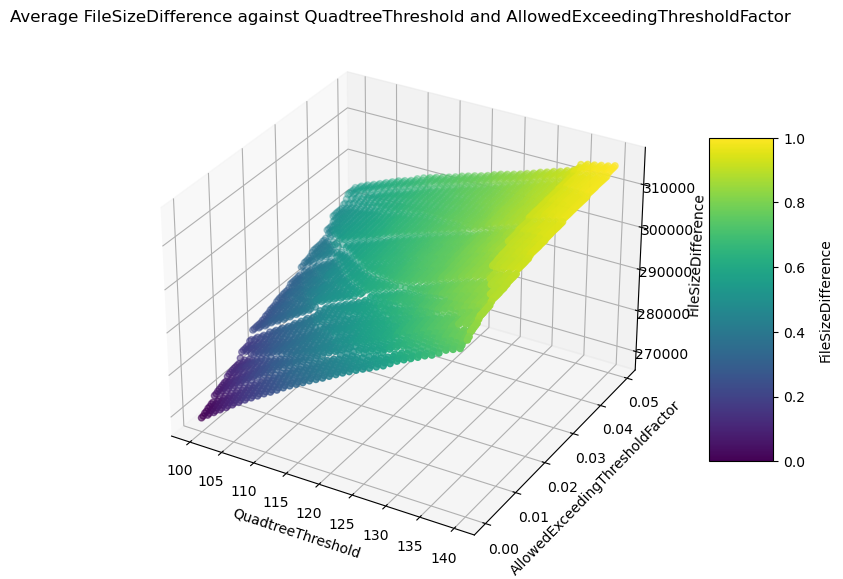

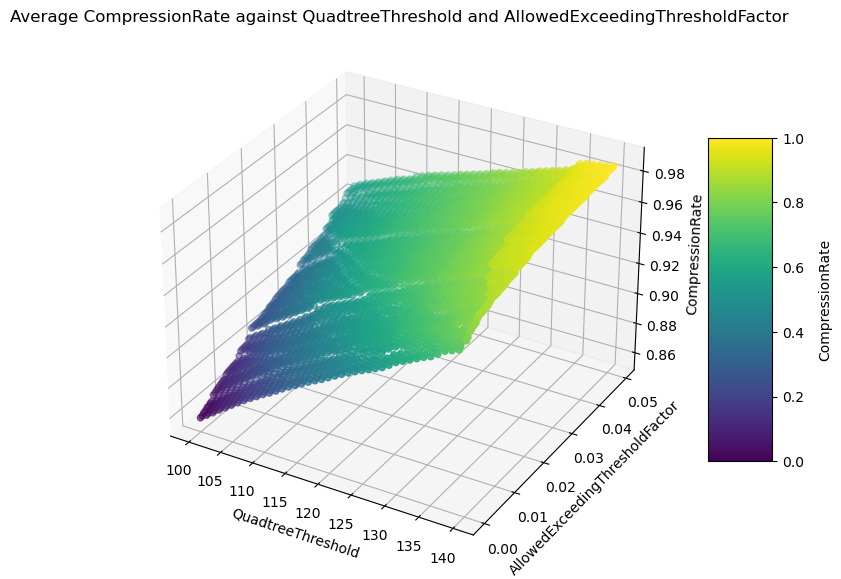

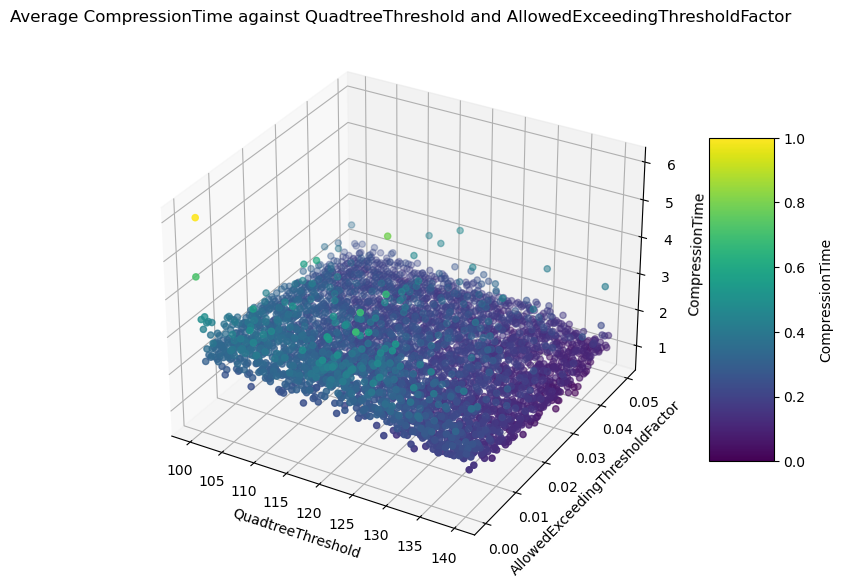

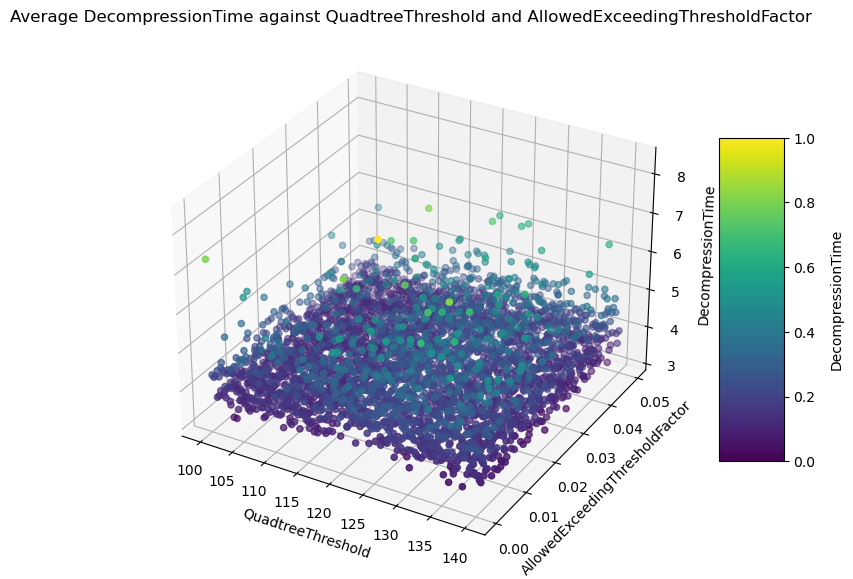

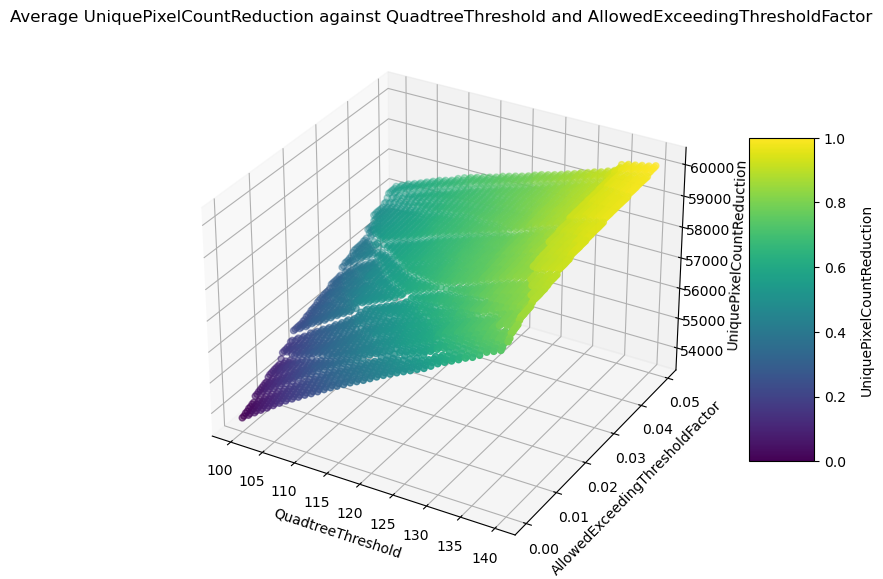

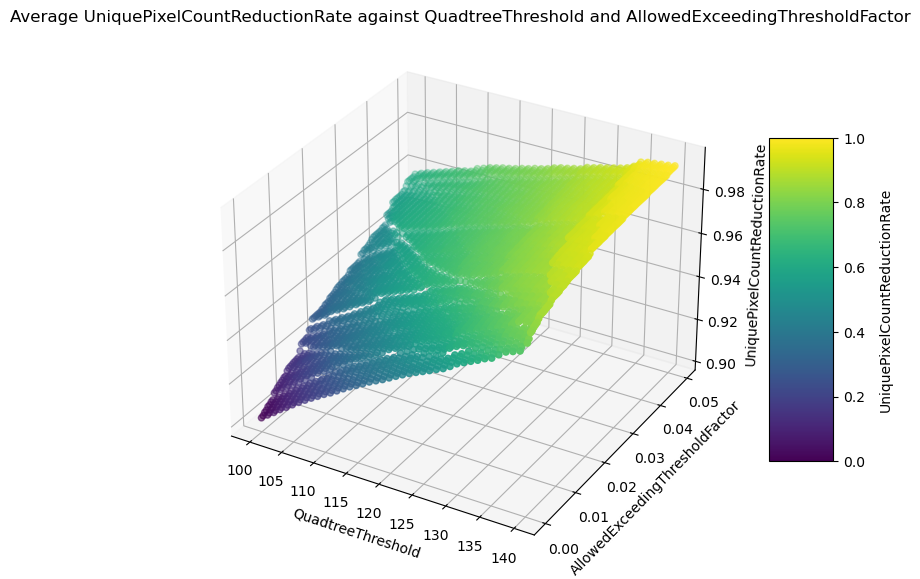

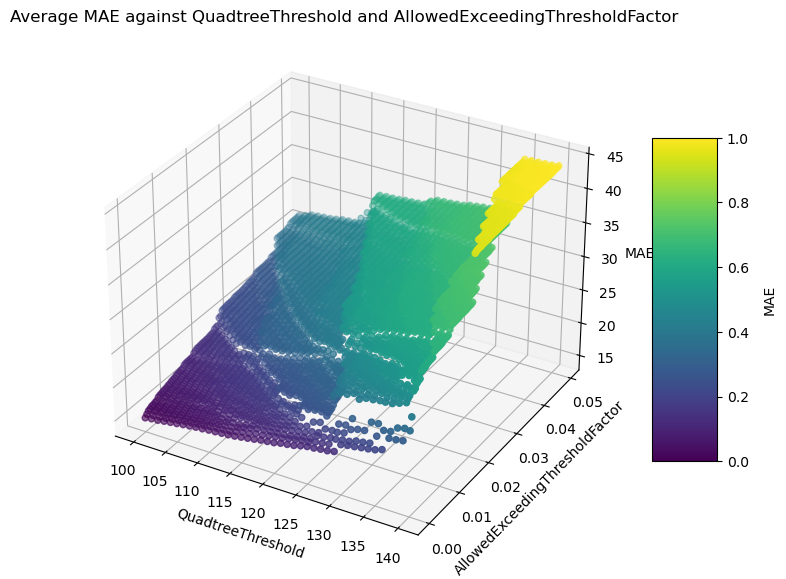

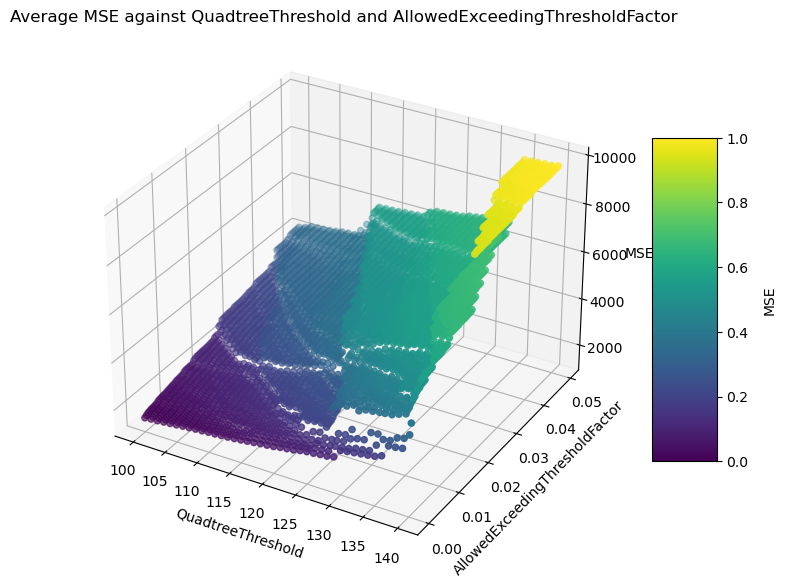

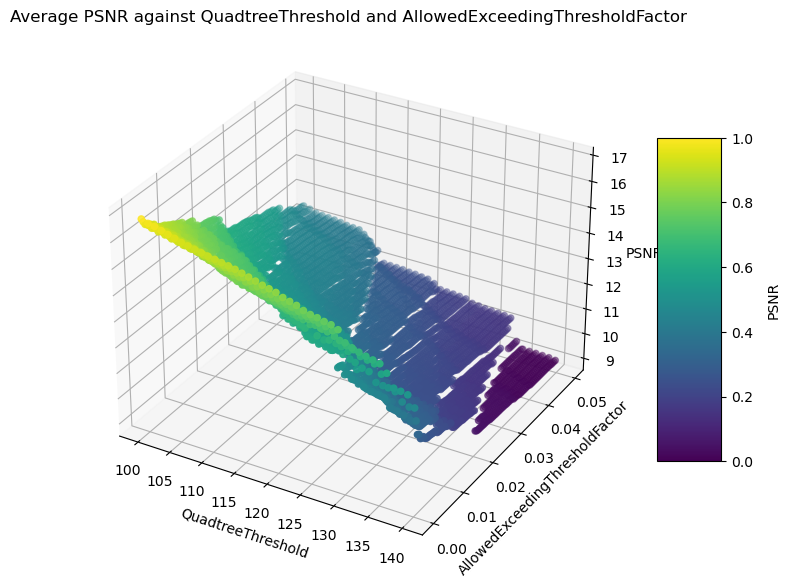

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


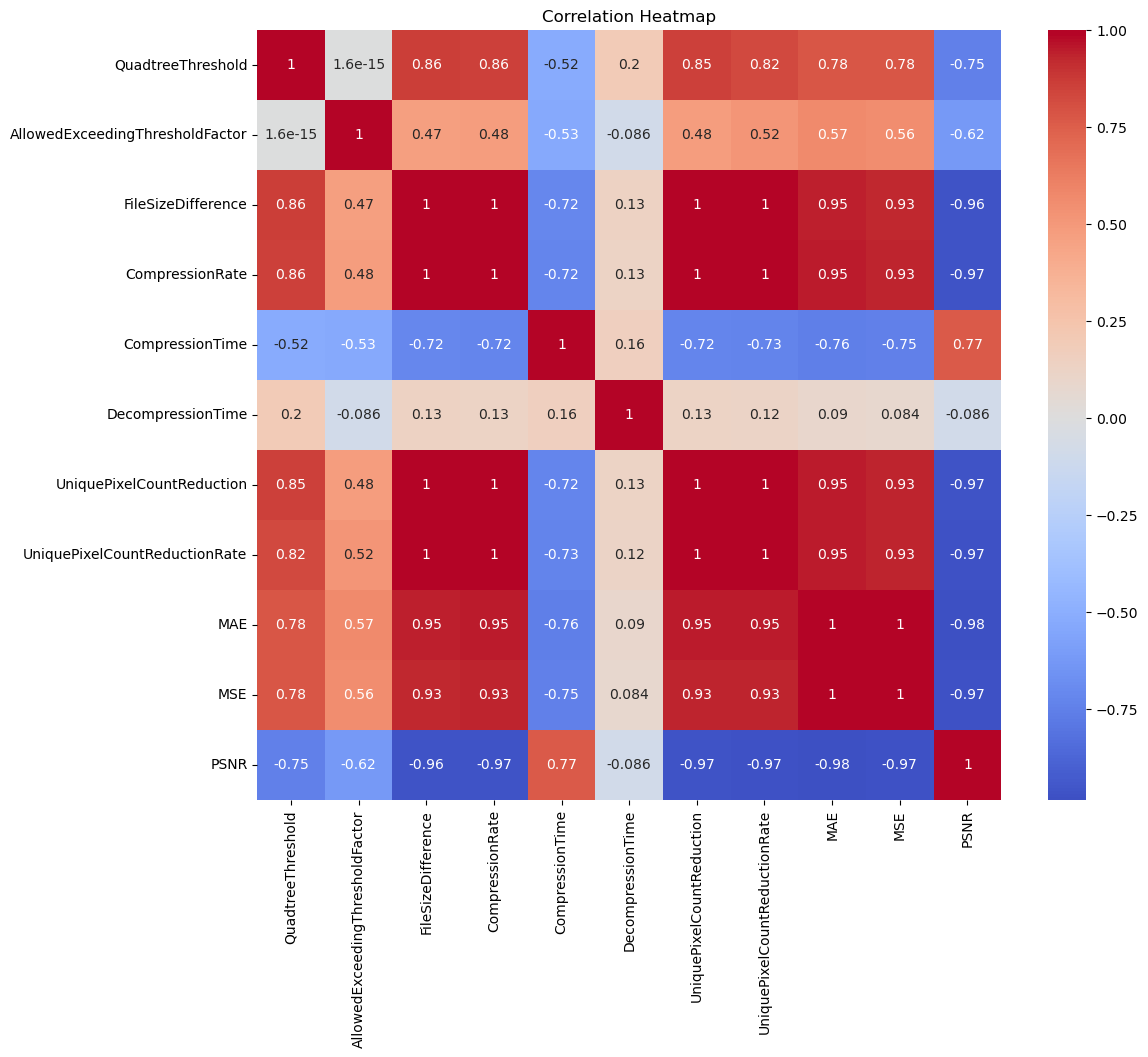

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [3]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

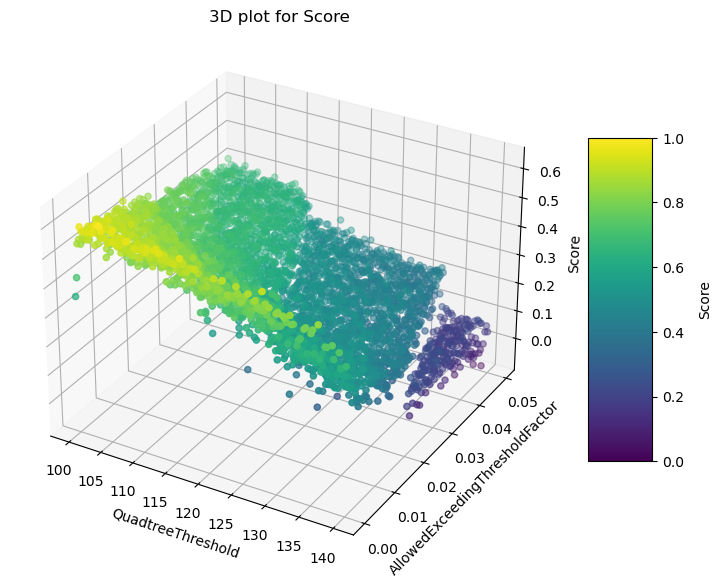

In [4]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

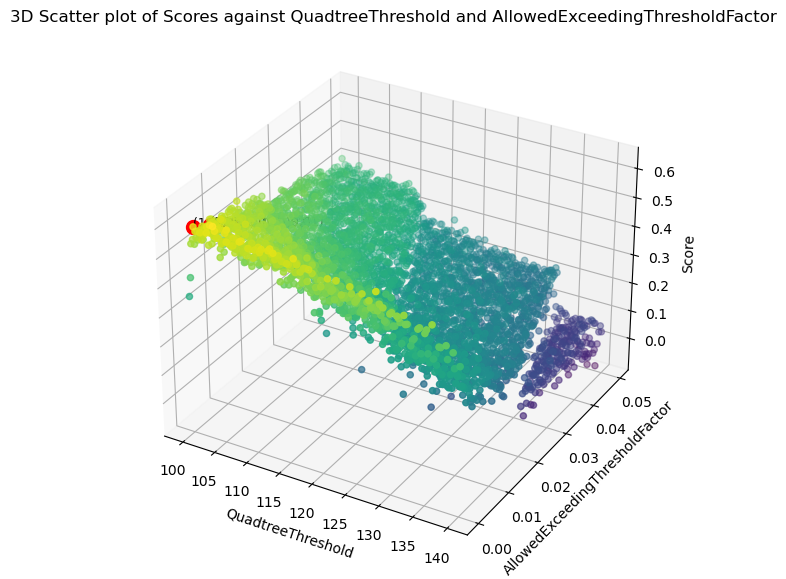

In [5]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [6]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
400                104                            0.000  0.622286
302                103                            0.001  0.611378
100                101                            0.000  0.602301
